In [1]:
from multiprocessing import pool
import pandas as pd
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
import keras

import tensorflow_datasets as tfds
import tensorflow 
import random 
import matplotlib.pyplot as plt 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import keras.utils as image

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.optimizers import *
from keras.callbacks import *
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation

In [2]:
train = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test = ImageDataGenerator(rescale=1./255)

In [3]:
!unzip pac.zip


Streaming output truncated to the last 5000 lines.
 extracting: pac/v/cap296.png.png    
 extracting: pac/v/cap297.png.png    
 extracting: pac/v/cap298.png.png    
 extracting: pac/v/cap299.png.png    
 extracting: pac/v/cap3.png.png      
 extracting: pac/v/cap30.png.png     
 extracting: pac/v/cap300.png.png    
  inflating: pac/v/cap301.png.png    
  inflating: pac/v/cap302.png.png    
 extracting: pac/v/cap303.png.png    
 extracting: pac/v/cap304.png.png    
 extracting: pac/v/cap305.png.png    
 extracting: pac/v/cap306.png.png    
 extracting: pac/v/cap307.png.png    
 extracting: pac/v/cap308.png.png    
 extracting: pac/v/cap309.png.png    
 extracting: pac/v/cap31.png.png     
 extracting: pac/v/cap310.png.png    
 extracting: pac/v/cap311.png.png    
 extracting: pac/v/cap312.png.png    
 extracting: pac/v/cap313.png.png    
 extracting: pac/v/cap314.png.png    
 extracting: pac/v/cap315.png.png    
 extracting: pac/v/cap316.png.png    
 extracting: pac/v/cap317.png.png    

In [4]:
import os

In [5]:
data_path = "/content/pac"

In [6]:
files = os.listdir(data_path)[0:]
print(files)

['b', 'j', 'g_', 'm', 'f', 'u_', 'n_', 'x', 'r', 'i', 'a', 'b_', 't_', 'm_', 'r_', 't', 'e', 'o', 'a_', 'y_', 'e_', 'l', 'c', 'h', 'f_', 'n', 'q', 's', 'k', 'p_', 'j_', 'd_', 'p', 'g', 'y', 'l_', 'w', 'v', 'x_', 'd', 'q_', 'u', 'i_', 'z', 'h_']


In [7]:
files = os.listdir(data_path)[0:]

classes = {'b':0, 'j':1, 'g_':2, 'm':3, 'f':4, 'u_':5, 'n_':6, 'x':7, 'r':8, 'i':9, 'a':10, 'b_':11, 't_':12, 'm_':13, 'r_':14, 't':15, 'e':16, 'o':17, 'a_':18, 'y_':19, 'e_':20, 'l':21, 'c':22, 'h':23, 'f_':24, 'n':25, 'q':26, 's':27, 'k':28, 'p_':29, 'j_':30, 'd_':31, 'p':32, 'g':33, 'y':34, 'l_':35, 'w':36, 'v':37, 'x_':38, 'd':39, 'q_':40, 'u':41, 'i_':42, 'z':43, 'h_':44}


In [8]:
from re import I
import PIL
from PIL import Image
import cv2

X = []
Y = []

for cl in classes:
  path = data_path + "/" + cl
  for i_name in os.listdir(path):
    f_img = path + "/" + i_name
    img = Image.open(f_img)
    img = img.convert('L')
    img = img.resize((28,28))
    img.save(f_img)

In [9]:
for cl in classes:
  path = data_path + "/" + cl
  for i_name in os.listdir(path):
    img = cv2.imread(path + "/" + i_name, 0)
    X.append(img)
    Y.append(classes[cl])

In [10]:
X = np.array(X)
Y = np.array(Y)

In [11]:
X.shape

(30037, 28, 28)

0


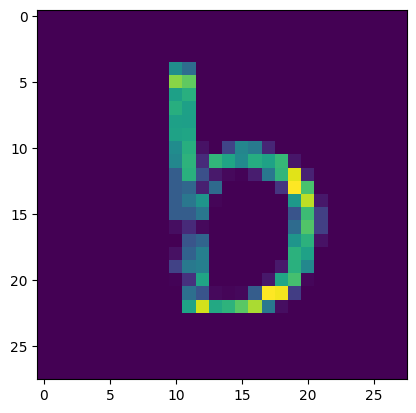

In [12]:
plt.imshow(X[25])
print(Y[25])

In [13]:
d_X = X[0:3]

In [14]:
X_new = X.reshape(len(X), -1)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.40, random_state=10)

In [16]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [17]:
x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)
x_train = x_train / 255.
x_test = x_test / 255.

In [18]:
print(x_train.shape)

(18022, 28, 28)


In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(45, activation='softmax')
])


In [36]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

In [37]:
history=model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
282/282 [==============================] - 6s 15ms/step - loss: 0.0360 - sparse_categorical_accuracy: 0.9886 - val_loss: 0.1798 - val_sparse_categorical_accuracy: 0.9720
Epoch 2/50
282/282 [==============================] - 4s 13ms/step - loss: 0.0327 - sparse_categorical_accuracy: 0.9887 - val_loss: 0.2013 - val_sparse_categorical_accuracy: 0.9703
Epoch 3/50
282/282 [==============================] - 4s 13ms/step - loss: 0.0386 - sparse_categorical_accuracy: 0.9893 - val_loss: 0.2041 - val_sparse_categorical_accuracy: 0.9697
Epoch 4/50
282/282 [==============================] - 4s 14ms/step - loss: 0.0353 - sparse_categorical_accuracy: 0.9903 - val_loss: 0.2008 - val_sparse_categorical_accuracy: 0.9683
Epoch 5/50
282/282 [==============================] - 4s 13ms/step - loss: 0.0348 - sparse_categorical_accuracy: 0.9896 - val_loss: 0.2242 - val_sparse_categorical_accuracy: 0.9697
Epoch 6/50
282/282 [==============================] - 4s 13ms/step - loss: 0.0324 - sparse_cate

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                        

In [39]:
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

94/94 [==============================] - 1s 6ms/step - loss: 0.3122 - sparse_categorical_accuracy: 0.9701
test loss, test acc: [0.31224626302719116, 0.9701206684112549]


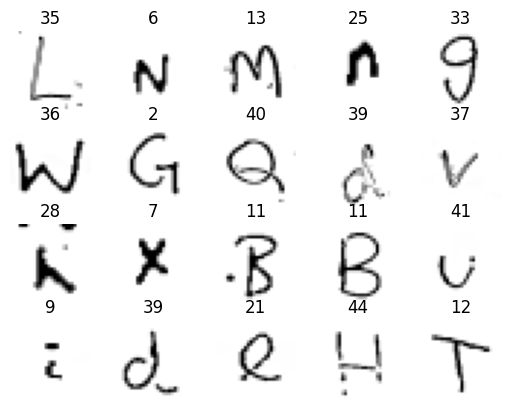

In [23]:
from numpy import random
for i in range(1,21):
    a = random.randint(len(x_test))
    img = x_test[a]
    img_res = img.reshape(28,28)
    plt.subplot(4,5,i)
    plt.imshow(img_res, cmap='binary')
    plt.axis('off')
    plt.title(y_test[a])
plt.show()

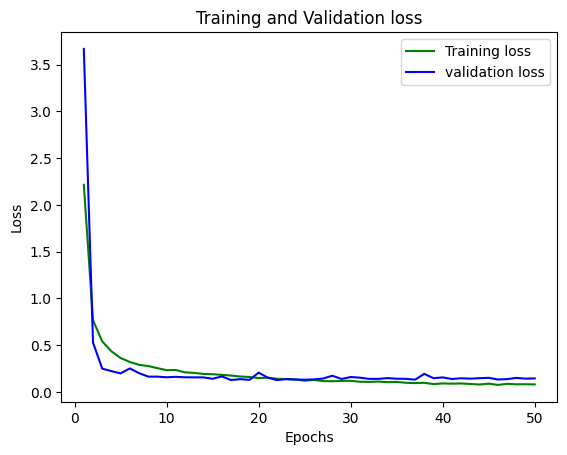

In [25]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

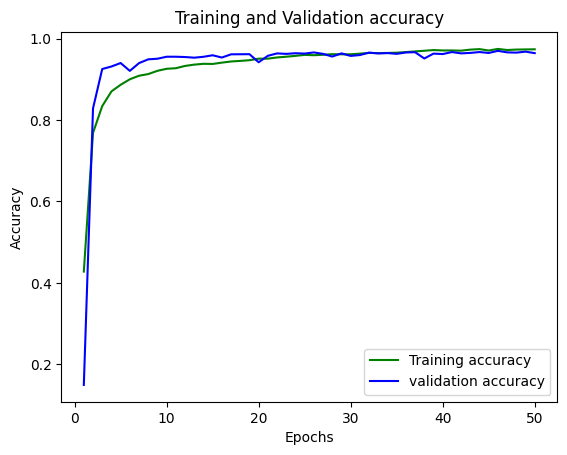

In [26]:
acc_train = history.history['sparse_categorical_accuracy']
acc_val = history.history['val_sparse_categorical_accuracy']
epochs = range(1,51)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
model.save('writtenmodel')